## Polynomials 2

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
# def polynomial_fit(x_train, y_train, x_test, degree):
#     coefficients = np.polyfit(x_train, y_train, degree)
#     y_test = np.polyval(coefficients, x_test)
#     return y_test

In [5]:
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2

n_points=16
noise_level=0.2

n_train_points=int(np.floor(n_points*0.8))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(5) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

12 4


(-0.5, 2.0)

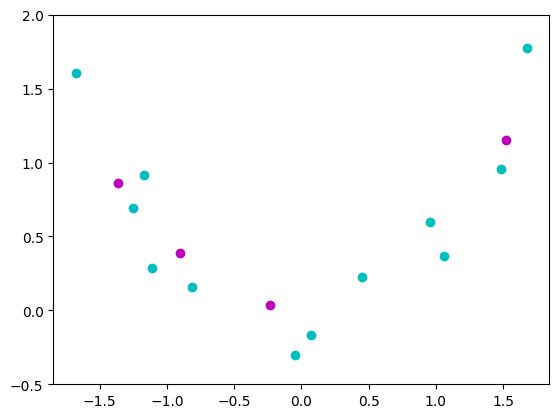

In [6]:
# plt.plot(all_x, all_y)
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2960568636.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, degree)


(-0.5, 2.0)

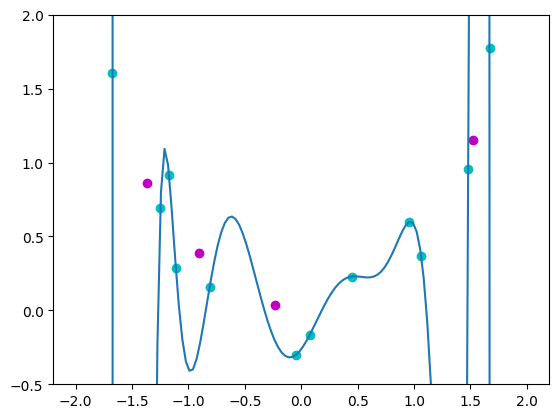

In [7]:
degree=50
coefficients = np.polyfit(x_train, y_train, degree)
all_y_fit = np.polyval(coefficients, all_x)

plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.plot(all_x, all_y_fit)

plt.ylim([-0.5, 2])

Interesting, seems like `np.polyfit` isn't going to play this game lol. 

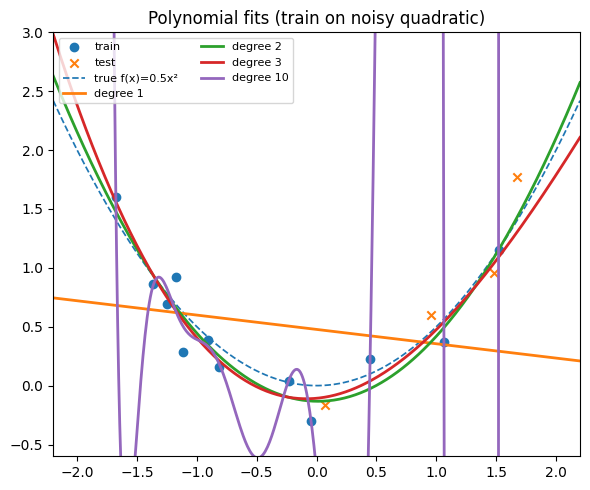

/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2829975554.py:34: RankWarning: Polyfit may be poorly conditioned
  c = np.polyfit(xtr, ytr, deg)
/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2829975554.py:34: RankWarning: Polyfit may be poorly conditioned
  c = np.polyfit(xtr, ytr, deg)
/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2829975554.py:34: RankWarning: Polyfit may be poorly conditioned
  c = np.polyfit(xtr, ytr, deg)
/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2829975554.py:34: RankWarning: Polyfit may be poorly conditioned
  c = np.polyfit(xtr, ytr, deg)
/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2829975554.py:34: RankWarning: Polyfit may be poorly conditioned
  c = np.polyfit(xtr, ytr, deg)
/var/folders/3_/n71kcsw11c738gxl_vm5hbnc0000gn/T/ipykernel_97669/2829975554.py:34: RankWarning: Polyfit may be poorly conditioned
  c = np.polyfit(xtr, ytr, deg)
/var/folders/3_/n71kcsw11c73

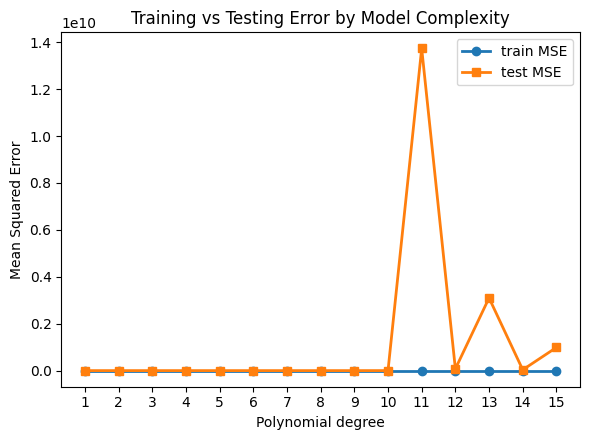

In [9]:
# Polynomial over/underfitting demo for paragraphs 7–12
# - No background image
# - Uses matplotlib (no seaborn), no explicit colors, no subplots

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.animation import FuncAnimation, PillowWriter

# ----- data -----
np.random.seed(5)          # 2 or 5 both look nice
n_points = 16
noise_level = 0.20
train_frac = 0.8

def f_true(x):             # ground-truth function
    return 0.5 * x**2

x = np.random.uniform(-2, 2, n_points)
y = f_true(x) + noise_level * np.random.randn(n_points)

# shuffle & split
idx = np.arange(n_points)
np.random.shuffle(idx)
x, y = x[idx], y[idx]
n_train = int(np.floor(n_points*train_frac))
x_train, y_train = x[:n_train], y[:n_train]
x_test,  y_test  = x[n_train:], y[n_train:]

x_grid = np.linspace(-2.2, 2.2, 500)
y_true_grid = f_true(x_grid)

def fit_predict(xtr, ytr, xeval, deg):
    c = np.polyfit(xtr, ytr, deg)
    return np.polyval(c, xeval), c

def mse(a, b):
    return float(np.mean((a-b)**2))

# ----- overlay fits: 1, 2, 3, 10 -----
overlay_degrees = [1, 2, 3, 10]
plt.figure(figsize=(6,5))
plt.scatter(x_train, y_train, label="train")
plt.scatter(x_test,  y_test, marker="x", label="test")
plt.plot(x_grid, y_true_grid, linestyle="--", linewidth=1.25, label="true f(x)=0.5x²")
for d in overlay_degrees:
    y_fit, _ = fit_predict(x_train, y_train, x_grid, d)
    plt.plot(x_grid, y_fit, linewidth=2, label=f"degree {d}")
plt.ylim(-0.6, 3.0); plt.xlim(-2.2, 2.2)
plt.title("Polynomial fits (train on noisy quadratic)")
plt.legend(loc="upper left", ncols=2, fontsize=8)
plt.tight_layout()
plt.show()

# ----- error curves: train/test MSE vs degree -----
max_degree_for_errors = 15
degrees = list(range(1, max_degree_for_errors+1))
train_mse, test_mse = [], []
for d in degrees:
    ytr_pred, _ = fit_predict(x_train, y_train, x_train, d)
    yte_pred, _ = fit_predict(x_train, y_train, x_test,  d)
    train_mse.append(mse(y_train, ytr_pred))
    test_mse.append(mse(y_test,  yte_pred))

plt.figure(figsize=(6,4.5))
plt.plot(degrees, train_mse, marker="o", linewidth=2, label="train MSE")
plt.plot(degrees, test_mse, marker="s", linewidth=2, label="test MSE")
plt.xlabel("Polynomial degree"); plt.ylabel("Mean Squared Error")
plt.title("Training vs Testing Error by Model Complexity")
plt.xticks(degrees); plt.legend(); plt.tight_layout()
plt.show()

# ----- optional animation (degree 1..12) -----
anim_degrees = range(1, 13)
fig = plt.figure(figsize=(6,5))
ax = plt.gca()
ax.scatter(x_train, y_train, label="train")
ax.scatter(x_test,  y_test, marker="x", label="test")
ax.plot(x_grid, y_true_grid, linestyle="--", linewidth=1.25, label="true f(x)=0.5x²")
(line_fit,) = ax.plot([], [], linewidth=2, label="fit")
title = ax.text(0.02, 0.95, "", transform=ax.transAxes, va="top")
ax.set_xlim(-2.2, 2.2); ax.set_ylim(-0.6, 3.0); ax.legend(loc="upper left", ncols=2, fontsize=8)

def init():
    line_fit.set_data([], []); title.set_text(""); return (line_fit, title)

def update(d):
    y_fit, _ = fit_predict(x_train, y_train, x_grid, d)
    line_fit.set_data(x_grid, y_fit); title.set_text(f"Polynomial degree: {d}")
    return (line_fit, title)

anim = FuncAnimation(fig, update, frames=anim_degrees, init_func=init, blit=True, interval=600, repeat=False)
# To save: anim.save("polynomial_fit_animation.gif", writer=PillowWriter(fps=2))
plt.close(fig)
